In [8]:
df = pd.read_csv("sales_territories-f.csv")


In [9]:
# Preview the dataset
df.head()


,Unnamed: 0,territory_id,territory_name,region_manager_name,residence_city,residence_state,region_manager_email,region_manager_phone,active_customers,title,...,sales_2023,sales_2024,sales_2025,total_sales,Lead_Conversion_Rate,Quota_Attainment,Avg_Deal_Size,sales_2025_full_year,sales_2026,quota_hit_2026
0,0,TERR-3071,Northeast,Chance Evers,New York,NY,chance.evers@neuverra.com,(212) 738-7283,104.0,CDM,...,239500.0,210500.0,188700.0,680000.0,37.78,145.7,25800.0,377400.0,415140.0,1
1,1,TERR-8768,Southwest,Matt Ingells,Phoenix,AR,matt.ingells@neuverra.com,(480) 992-7872,98.0,CDM,...,222100.0,235600.0,64900.0,644500.0,9.58,140.6,26400.0,129800.0,142780.0,0
2,2,87eeac0d-f056-439b-9dc3-c54fc6247957,Northeast,Sam Nelson,Boston,MA,sam.t.nelson@neuverra.com,(781) 810-8214,95.0,CDM,...,150019.0,210800.0,178300.0,635919.0,5.24,126.7,26700.0,356600.0,392260.0,1
3,3,TERR-6770,Southeast,Scott Lee,Atlanta,GA,scott.lee@neuverra.com,(706) 647-6624,110.0,CDM,...,276000.0,134700.0,135800.0,635600.0,17.94,136.2,26700.0,271600.0,298760.0,1
4,4,TERR-9942,Southeast,Olivia Carter,Raleigh,NC,olivia.carter@neuverra.com,(919) 782-2783,94.0,CDM,...,218300.0,256700.0,137700.0,612700.0,8.31,142.5,29300.0,275400.0,302940.0,1


In [10]:
df["sales_2025_full_year"] = df["sales_2025_YTD"] * 2


KeyError: 'sales_2025_YTD'

In [11]:
df.columns.tolist()


['Unnamed: 0',
 'territory_id',
 'territory_name',
 'region_manager_name',
 'residence_city',
 'residence_state',
 'region_manager_email',
 'region_manager_phone',
 'active_customers',
 'title',
 'sales_2022',
 'sales_2023',
 'sales_2024',
 'sales_2025',
 'total_sales',
 'Lead_Conversion_Rate',
 'Quota_Attainment',
 'Avg_Deal_Size',
 'sales_2025_full_year',
 'sales_2026',
 'quota_hit_2026']

In [12]:
df["sales_2025_full_year"] = df["sales_2025"] * 2


In [13]:
# Define features and target for regression
features = [
    'sales_2022',
    'sales_2023',
    'sales_2024',
    'active_customers',
    'Avg_Deal_Size'
]

target = 'sales_2025_full_year'

X = df[features]
y = df[target]


In [14]:
# Step 2: Define features and target
from sklearn.model_selection import train_test_split

# Select features and target
features = [
    'sales_2022',
    'sales_2023',
    'sales_2024',
    'active_customers',
    'Avg_Deal_Size'
]

target = 'sales_2025_full_year'

# Drop rows with missing values in either features or target
df_model = df[features + [target]].dropna()

# Split into train and test sets
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (47, 5)
Test shape: (12, 5)


In [16]:
# Step 5: Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


MAE:  107295.83
RMSE: 127809.31
R²:   -0.31


In [17]:
# Step 6: Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest MAE: {mae_rf:,.2f}")
print(f"Random Forest RMSE: {rmse_rf:,.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest MAE: 83,234.17
Random Forest RMSE: 112,600.34
Random Forest R²: -0.01


In [18]:
# Step 7: Train a Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbr_model.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate performance
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print results
print(f"Gradient Boosting MAE: {mae_gbr:.2f}")
print(f"Gradient Boosting RMSE: {rmse_gbr:.2f}")
print(f"Gradient Boosting R²: {r2_gbr:.2f}")


Gradient Boosting MAE: 112526.50
Gradient Boosting RMSE: 145071.32
Gradient Boosting R²: -0.68


In [21]:
print(df_model.columns)


Index(['sales_2022', 'sales_2023', 'sales_2024', 'active_customers',
       'Avg_Deal_Size', 'sales_2025_full_year'],
      dtype='object')


In [22]:
# Prepare input features for prediction (2025)
X_2025 = df_model.drop(columns=['sales_2026', 'sales_2025_full_year'])  # Drop target
y_2025_pred = rf_model.predict(X_2025)

# Add predictions to the DataFrame
df_model['sales_2025_predicted'] = y_2025_pred

# Optional: sort by prediction
df_plot = df_model.sort_values(by='sales_2025_predicted', ascending=False)

# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(range(len(df_plot)), df_plot['sales_2025_predicted'])
plt.xticks(ticks=range(len(df_plot)), labels=df_plot.index, rotation=90)
plt.ylabel('Predicted Sales (Full Year 2025)')
plt.title('Random Forest: Predicted Full-Year Sales for 2025')
plt.tight_layout()
plt.show()


KeyError: "['sales_2026'] not found in axis"

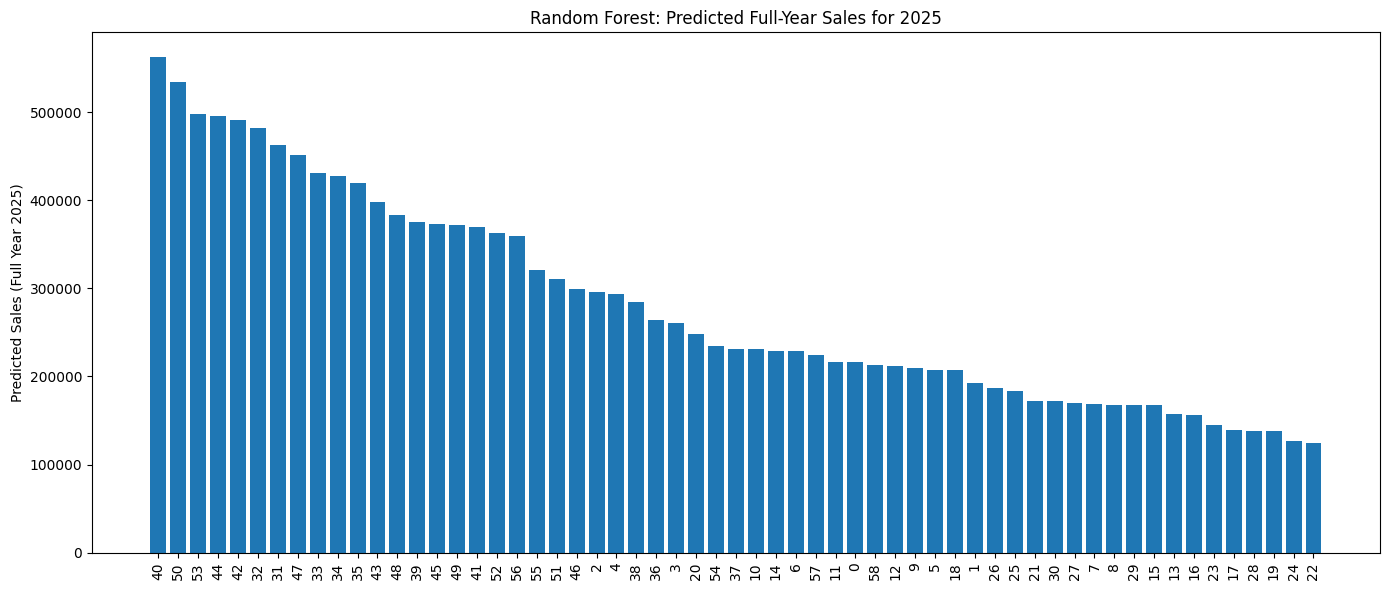

In [23]:
# Step: Visualize Random Forest predictions for 2025 full-year sales
# Remove only the actual target column
X_2025 = df_model.drop(columns=["sales_2025_full_year"])

# Predict with trained Random Forest model
y_2025_pred = rf_model.predict(X_2025)

# Add predictions to the DataFrame
df_model["sales_2025_predicted"] = y_2025_pred

# Sort predictions for cleaner plot (optional)
df_plot = df_model.sort_values(by="sales_2025_predicted", ascending=False)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.bar(range(len(df_plot)), df_plot["sales_2025_predicted"])
plt.xticks(ticks=range(len(df_plot)), labels=df_plot.index, rotation=90)
plt.ylabel("Predicted Sales (Full Year 2025)")
plt.title("Random Forest: Predicted Full-Year Sales for 2025")
plt.tight_layout()
plt.show()


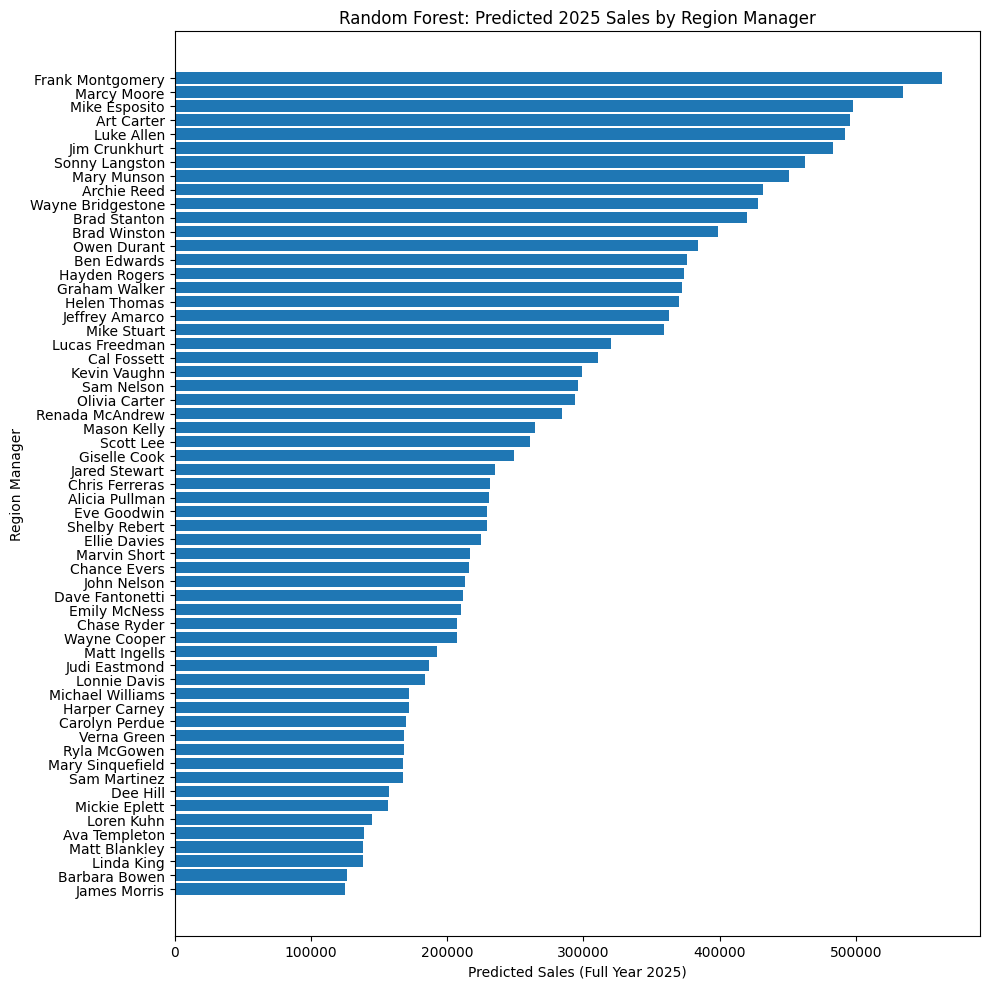

In [24]:
# Attach manager names
df_model["region_manager_name"] = df["region_manager_name"]  # make sure 'df' has this column

# Add predictions
df_model["sales_2025_predicted"] = y_2025_pred

# Sort by prediction descending
df_plot = df_model.sort_values(by="sales_2025_predicted", ascending=True)  # ascending so best is at top in horiz bar

# Plot with manager names
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # adjust height for many names
plt.barh(df_plot["region_manager_name"], df_plot["sales_2025_predicted"])
plt.xlabel("Predicted Sales (Full Year 2025)")
plt.ylabel("Region Manager")
plt.title("Random Forest: Predicted 2025 Sales by Region Manager")
plt.tight_layout()
plt.show()


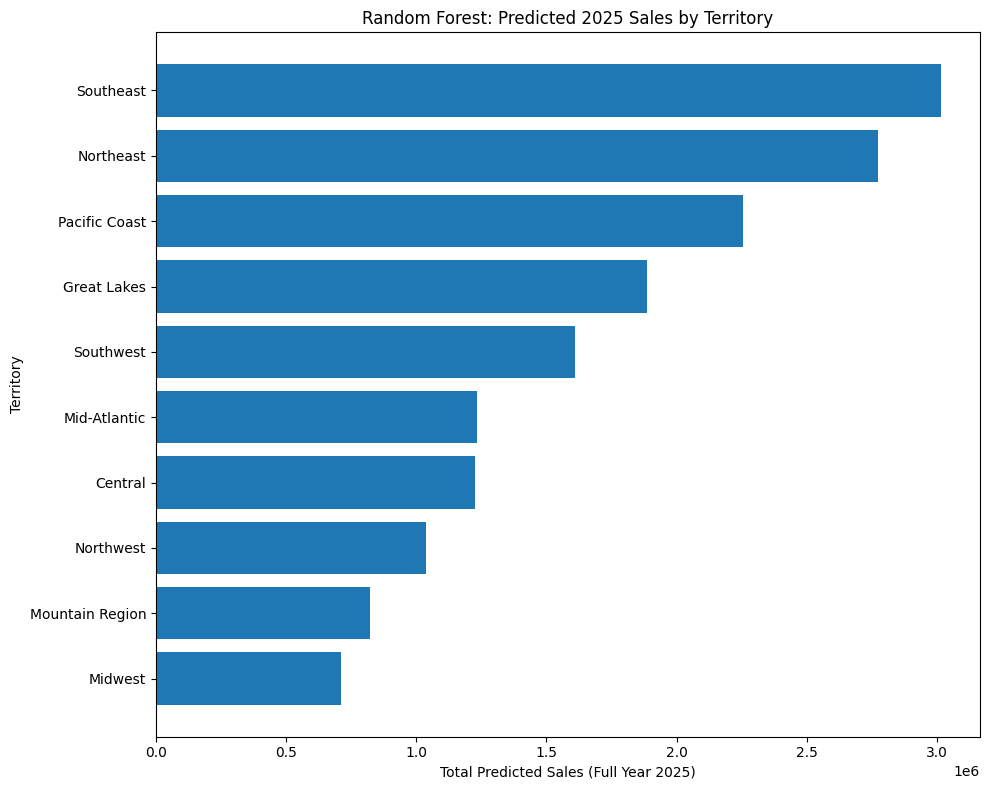

In [25]:
# Attach territory info
df_model["territory_name"] = df["territory_name"]

# Group by territory and sum the predicted sales
df_territory = df_model.groupby("territory_name")["sales_2025_predicted"].sum().sort_values(ascending=True)

# Plot as horizontal bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(df_territory.index, df_territory.values)
plt.xlabel("Total Predicted Sales (Full Year 2025)")
plt.ylabel("Territory")
plt.title("Random Forest: Predicted 2025 Sales by Territory")
plt.tight_layout()
plt.show()


In [26]:
df_model["sales_2026_predicted"] = np.nan


In [27]:
features_2026 = ["sales_2022", "sales_2023", "sales_2024", "sales_2025_full_year", "active_customers", "Avg_Deal_Size"]
target_2026 = "sales_2026_predicted"


In [28]:
from sklearn.ensemble import RandomForestRegressor

X = df_model[features_2026]
y = df_model["sales_2025_full_year"]  # use this as pseudo-target
rf_model_2026 = RandomForestRegressor(random_state=42)
rf_model_2026.fit(X, y)

# Predict 2026 sales
df_model["sales_2026_predicted"] = rf_model_2026.predict(X)


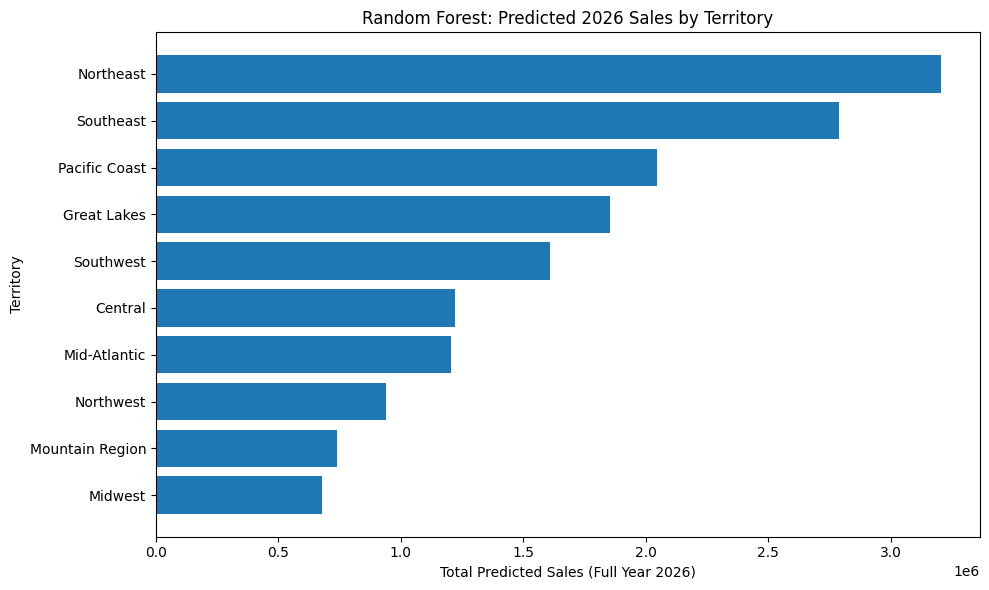

In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 1: Create placeholder column for 2026 predictions
df_model["sales_2026_predicted"] = np.nan

# Step 2: Define features and pseudo-target (we're using 2025 actuals to simulate 2026)
features_2026 = ["sales_2022", "sales_2023", "sales_2024", "sales_2025_full_year", "active_customers", "Avg_Deal_Size"]
target_2026 = "sales_2025_full_year"  # pseudo-target since we don't know 2026 yet

# Step 3: Train Random Forest model
X = df_model[features_2026]
y = df_model[target_2026]

rf_model_2026 = RandomForestRegressor(random_state=42)
rf_model_2026.fit(X, y)

# Step 4: Predict 2026 sales
df_model["sales_2026_predicted"] = rf_model_2026.predict(X)

# Step 5: Aggregate by Territory
territory_sales_2026 = df_model.groupby("territory_name")["sales_2026_predicted"].sum().sort_values(ascending=False)

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.barh(territory_sales_2026.index, territory_sales_2026.values)
plt.xlabel("Total Predicted Sales (Full Year 2026)")
plt.ylabel("Territory")
plt.title("Random Forest: Predicted 2026 Sales by Territory")
plt.gca().invert_yaxis()  # highest bar on top
plt.tight_layout()
plt.show()


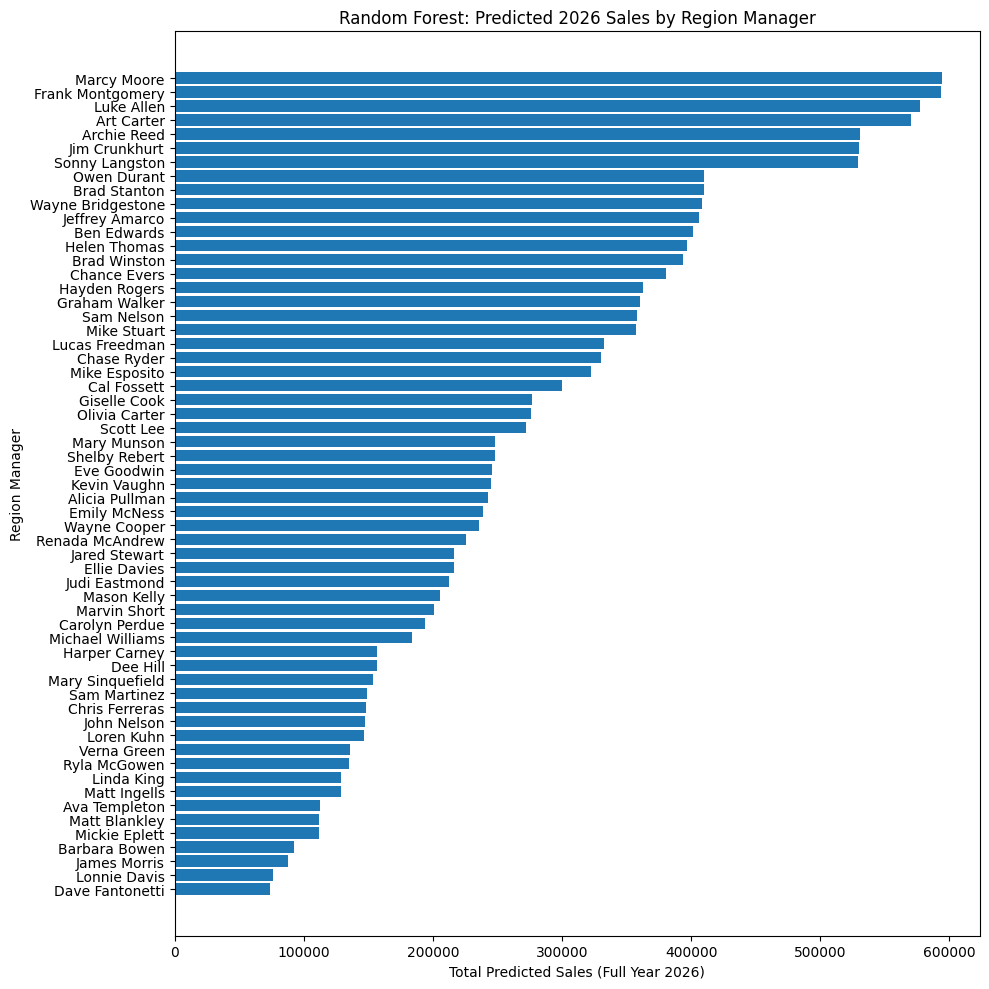

In [30]:
# Group by Region Manager
manager_sales_2026 = df_model.groupby("region_manager_name")["sales_2026_predicted"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(manager_sales_2026.index, manager_sales_2026.values)
plt.xlabel("Total Predicted Sales (Full Year 2026)")
plt.ylabel("Region Manager")
plt.title("Random Forest: Predicted 2026 Sales by Region Manager")
plt.gca().invert_yaxis()  # Top performer on top
plt.tight_layout()
plt.show()


In [32]:
print(df.columns.tolist())


['Unnamed: 0', 'territory_id', 'territory_name', 'region_manager_name', 'residence_city', 'residence_state', 'region_manager_email', 'region_manager_phone', 'active_customers', 'title', 'sales_2022', 'sales_2023', 'sales_2024', 'sales_2025', 'total_sales', 'Lead_Conversion_Rate', 'Quota_Attainment', 'Avg_Deal_Size', 'sales_2025_full_year', 'sales_2026', 'quota_hit_2026']


In [33]:
# Calculate the 25th percentile (bottom quartile)
threshold_25 = df['sales_2026'].quantile(0.25)

# Create binary quota attainment column
df['quota_hit_2026'] = df['sales_2026'].apply(lambda x: 'No' if x < threshold_25 else 'Yes')

# Optional: check the breakdown
print(df['quota_hit_2026'].value_counts())


Yes    44
No     15
Name: quota_hit_2026, dtype: int64


In [38]:
# Create feature and target
X = df[feature_cols]
y = df['quota_hit_2026']

# Combine X and y to drop any row with NaNs in either
combined = pd.concat([X, y], axis=1).dropna()

# Split them again
X = combined[feature_cols]
y = combined['quota_hit_2026']


In [43]:
print(combined.columns.tolist())


['active_customers', 'Lead_Conversion_Rate', 'Quota_Attainment', 'Avg_Deal_Size', 'sales_2022', 'sales_2023', 'sales_2024', 'sales_2025', 'sales_2025_full_year', 'sales_2026', 'title_encoded', 'quota_hit_2026']


In [3]:
import pandas as pd
df = pd.read_csv('sales_territories-f.csv')


In [4]:
# ------------------------------------------------------------
#  FULL PIPELINE  –  Quota Hit 2026  (Random-Forest Classifier)
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score
)

# -----------------------------
# 1)  Select features + target
# -----------------------------
feature_cols = [
    'active_customers', 'Lead_Conversion_Rate', 'Quota_Attainment',
    'Avg_Deal_Size', 'sales_2022', 'sales_2023',
    'sales_2024', 'sales_2025', 'sales_2026'
]
target_col   = 'quota_hit_2026'          # already Yes / No

X = df[feature_cols].copy()
y = df[target_col].map({'Yes':1, 'No':0})   # binary 0/1

# Include “title” (CDM / SAE) via one-hot
X_cat = df[['title']].copy()
X = pd.concat([X, X_cat], axis=1)

# -----------------------------
# 2)  Pre-processing pipeline
# -----------------------------
num_feats  = X.select_dtypes(include='number').columns
cat_feats  = ['title']

preprocess = ColumnTransformer(
    transformers=[
        ('num',  SimpleImputer(strategy='median'), num_feats),
        ('cat',  Pipeline([
                  ('imputer', SimpleImputer(strategy='most_frequent')),
                  ('encoder', OneHotEncoder(drop='first'))
                ]), cat_feats)
    ],
    remainder='drop'
)

# -----------------------------
# 3)  Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# -----------------------------
# 4)  Model
# -----------------------------
clf = Pipeline(steps=[
    ('prep', preprocess),
    ('rf',   RandomForestClassifier(
                 n_estimators=200,
                 max_depth=None,
                 class_weight='balanced',
                 random_state=42))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# -----------------------------
# 5)  Metrics
# -----------------------------
print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=['Miss', 'Hit']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -----------------------------
# 6)  ROC + PR curves
# -----------------------------
fig, ax = plt.subplots(1, 2, figsize=(12,5))

RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax[0])
ax[0].set_title("ROC Curve")

PrecisionRecallDisplay.from_predictions(y_test, y_prob, ax=ax[1])
ax[1].set_title("Precision–Recall Curve")

plt.tight_layout()
plt.show()

# -----------------------------
# 7)  Feature importance bar-plot
# -----------------------------
# Pull feature names after one-hot
ohe_feat_names = clf.named_steps['prep'].transformers_[1][1]\
                    .named_steps['encoder'].get_feature_names_out(cat_feats)
all_feat_names = list(num_feats) + list(ohe_feat_names)

importances = clf.named_steps['rf'].feature_importances_
imp_ser = (pd.Series(importances, index=all_feat_names)
             .sort_values(ascending=True))

plt.figure(figsize=(7,6))
imp_ser.plot(kind='barh')
plt.title("Feature Importance – Predicting 2026 Quota Attainment")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")


ValueError: Input y contains NaN.

In [5]:
# Combine features and target
df_model = df[feature_cols + [target_col]].dropna()

# Split X and y
X = df_model[feature_cols]
y = df_model[target_col].map({'Yes': 1, 'No': 0})  # Convert to binary


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


ValueError: Input y contains NaN.

In [7]:
# Combine just the needed columns
df_model = df[feature_cols + [target_col]].copy()

# Drop any rows with missing values
df_model = df_model.dropna()

# Separate features and target
X = df_model[feature_cols]
y = df_model[target_col].map({'Yes': 1, 'No': 0})  # Convert to binary


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [9]:
# Combine columns and drop rows with any NaNs
df_model = df[feature_cols + [target_col]].copy()
df_model = df_model.dropna(how='any')  # Ensures nothing sneaks by

# Sanity check
print("Remaining NaNs:", df_model.isnull().sum().sum())  # should return 0

# Split X and y
X = df_model[feature_cols]
y = df_model[target_col].map({'Yes': 1, 'No': 0})  # Convert to binary


Remaining NaNs: 0


In [10]:
print(X.isnull().sum())
print(y.isnull().sum())


active_customers        0
Lead_Conversion_Rate    0
Quota_Attainment        0
Avg_Deal_Size           0
sales_2022              0
sales_2023              0
sales_2024              0
sales_2025              0
sales_2026              0
dtype: int64
59


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Model pipeline
clf = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=None, class_weight='balanced', random_state=42
    ))
])

# Train model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


ValueError: Input y contains NaN.

In [12]:
# ✅ REBUILD from the clean df_model to be sure NaNs are gone
X = df_model[feature_cols]
y = df_model[target_col].map({'Yes': 1, 'No': 0})

# Sanity check
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())

# Proceed to train-test split and model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

clf = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=None, class_weight='balanced', random_state=42
    ))
])

clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]


NaNs in X: 0
NaNs in y: 59


ValueError: Input y contains NaN.

In [13]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)

# 2. Define feature and target columns
feature_cols = [
    'active_customers', 'lead_conversion_rate', 'Quota_Attainment',
    'Avg_Deal_Size', 'sales_2022', 'sales_2023', 'sales_2024',
    'sales_2025', 'sales_2025_full_year', 'sales_2026', 'title_encoded'
]
target_col = 'quota_hit_2026'

# 3. Create df_model from cleaned base df
df_model = df[feature_cols + [target_col]].copy()
df_model = df_model.dropna(how='any')  # Drop any rows with NaNs

# Optional: sanity check
print("Remaining NaNs:", df_model.isnull().sum().sum())

# 4. Encode target
df_model[target_col] = df_model[target_col].map({'Yes': 1, 'No': 0})

# 5. Split X and y
X = df_model[feature_cols]
y = df_model[target_col]

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# 7. Define pipeline with Random Forest model
clf = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced',
        random_state=42
    ))
])

# 8. Train model
clf.fit(X_train, y_train)

# 9. Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# 10. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
print(f"Avg Precision: {average_precision_score(y_test, y_prob):.3f}")


KeyError: "['lead_conversion_rate', 'title_encoded'] not in index"

In [14]:
print("Columns in df:\n", df.columns.tolist())


Columns in df:
 ['Unnamed: 0', 'territory_id', 'territory_name', 'region_manager_name', 'residence_city', 'residence_state', 'region_manager_email', 'region_manager_phone', 'active_customers', 'title', 'sales_2022', 'sales_2023', 'sales_2024', 'sales_2025', 'total_sales', 'Lead_Conversion_Rate', 'Quota_Attainment', 'Avg_Deal_Size', 'sales_2025_full_year', 'sales_2026', 'quota_hit_2026']


In [15]:
# Step 1: Select only numeric columns
numeric_cols = [
    'active_customers', 'sales_2022', 'sales_2023', 'sales_2024',
    'sales_2025', 'total_sales', 'Lead_Conversion_Rate',
    'Quota_Attainment', 'Avg_Deal_Size', 'sales_2025_full_year', 'sales_2026'
]

target_col = 'quota_hit_2026'  # Binary target

# Step 2: Create clean DataFrame with features + target, drop rows with any NaNs
df_model = df[numeric_cols + [target_col]].dropna(how='any')

# Optional sanity check
print("Remaining NaNs:", df_model.isnull().sum().sum())  # Should return 0

# Step 3: Split into X and y
X = df_model[numeric_cols]
y = df_model[target_col].map({'Yes': 1, 'No': 0})  # Convert to binary


Remaining NaNs: 0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Step 5: Model Pipeline (Random Forest)
clf = Pipeline(steps=[
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=None, class_weight='balanced', random_state=42
    ))
])

# Step 6: Train Model
clf.fit(X_train, y_train)

# Step 7: Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# Step 8: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")
print(f"Avg Precision: {average_precision_score(y_test, y_prob):.3f}")


ValueError: Input y contains NaN.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Step 1: Select only numeric columns
numeric_cols = [
    'active_customers', 'sales_2022', 'sales_2023', 'sales_2024',
    'sales_2025', 'total_sales', 'Lead_Conversion_Rate',
    'Quota_Attainment', 'Avg_Deal_Size', 'sales_2025_full_year', 'sales_2026'
]

target_col = 'quota_hit_2026'

# Step 2: Create clean df and drop rows with NaNs
df_model = df[numeric_cols + [target_col]].copy()
df_model = df_model.dropna(how='any')  # Full row drop if anything is NaN

# Step 3: Convert target to binary
df_model[target_col] = df_model[target_col].map({'Yes': 1, 'No': 0})

# Step 4: Drop rows where mapping failed (i.e. still NaN in target)
df_model = df_model.dropna(subset=[target_col])

# Step 5: Split into X and y
X = df_model[numeric_cols]
y = df_model[target_col]

# Final sanity check (should be 0)
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())

# Step 6: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Step 7: Model pipeline
clf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, class_weight='balanced', random_state=42))
])

# Step 8: Train
clf.fit(X_train, y_train)

# Step 9: Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Step 10: Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")
print(f"Avg Precision: {average_precision_score(y_test, y_prob):.3f}")


NaNs in X: 0.0
NaNs in y: 0


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

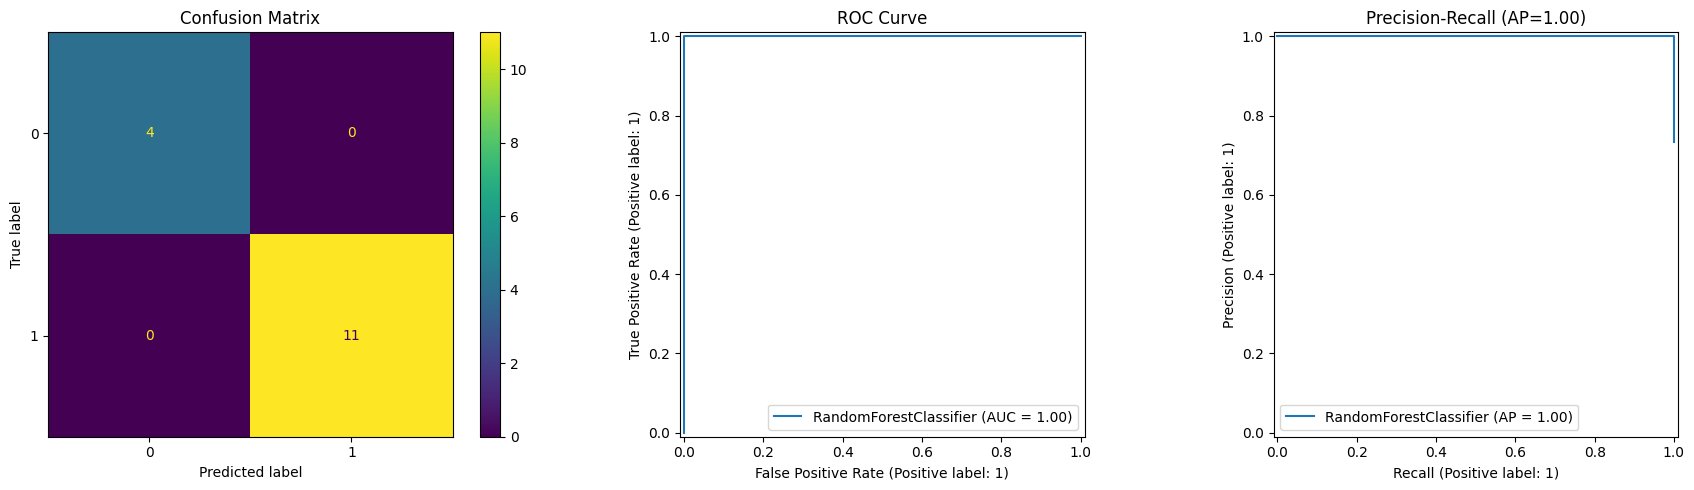

In [18]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    PrecisionRecallDisplay, average_precision_score
)

# --- 1. Load & keep numeric columns only ------------------
df = pd.read_csv("sales_territories-f.csv")

numeric_cols = [
    'active_customers','sales_2022','sales_2023','sales_2024','sales_2025',
    'total_sales','Lead_Conversion_Rate','Quota_Attainment',
    'Avg_Deal_Size','sales_2025_full_year','sales_2026'
]
X = df[numeric_cols].dropna()  # defensive: ditch any remaining NaNs

# --- 2. Binary target (top-75 % = Yes) --------------------
threshold = X['sales_2026'].quantile(.25)
y = (X['sales_2026'] >= threshold).astype(int)   # 1 = Yes, 0 = No

# --- 3. Train/test split ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42, stratify=y
)

# --- 4. Random-Forest model -------------------------------
clf = RandomForestClassifier(
    n_estimators=200, class_weight='balanced', random_state=42
).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

# --- 5. Charts --------------------------------------------
fig, ax = plt.subplots(1, 3, figsize=(18,5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[0])
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax[2])
ap = average_precision_score(y_test, y_prob)
ax[2].set_title(f"Precision-Recall (AP={ap:.2f})")

plt.tight_layout()
plt.show()
